**Pneumonia Detection**

In [ ]:
# Kaggle libray
! pip install -q kaggle

In [ ]:
from google.colab import files # CLASS files to upload files to colab

In [ ]:
#Uploading kaggle.json
files.upload()

In [ ]:
# Making directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading asl dataset and unzip to asl folder
! kaggle datasets download 'paultimothymooney/chest-xray-pneumonia'
! mkdir medical
! unzip chest-xray-pneumonia.zip  -d medical

Streaming output truncated to the last 5000 lines.
  inflating: medical/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: medical/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: m

In [ ]:
ls

chest-xray-pneumonia.zip  kaggle.json  medical/  sample_data/


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from time import time
import os
import cv2
import numpy as np
from PIL import Image
%matplotlib inline


normal_files=os.listdir('/content/medical/chest_xray/train/NORMAL')

print(normal_files[0:5])
print(normal_files[-5:])

['NORMAL2-IM-0395-0001-0002.jpeg', 'IM-0469-0001.jpeg', 'NORMAL2-IM-0811-0001.jpeg', 'NORMAL2-IM-1094-0001-0001.jpeg', 'IM-0466-0001.jpeg']
['NORMAL2-IM-0623-0001.jpeg', 'NORMAL2-IM-1214-0001.jpeg', 'NORMAL2-IM-0587-0001.jpeg', 'IM-0432-0001.jpeg', 'IM-0251-0001.jpeg']


In [ ]:
Pneumonia_files=os.listdir('/content/medical/chest_xray/train/PNEUMONIA')

print(Pneumonia_files[0:5])
print(Pneumonia_files[-5:])

['person441_bacteria_1911.jpeg', 'person301_bacteria_1429.jpeg', 'person988_virus_1666.jpeg', 'person1320_bacteria_3342.jpeg', 'person61_bacteria_296.jpeg']
['person431_bacteria_1872.jpeg', 'person724_virus_1344.jpeg', 'person390_bacteria_1781.jpeg', 'person488_bacteria_2062.jpeg', 'person305_virus_627.jpeg']


In [ ]:
print('Normal: ', len(normal_files))
print('Pneumonia: ',len(Pneumonia_files))

Normal:  1341
Pneumonia:  3875


In [ ]:
Normal_label=[0]*1341
Pneumonia_label=[1]*3875

In [ ]:
labels=Normal_label + Pneumonia_label

print('Labels are: ',len(labels))

Labels are:  5216


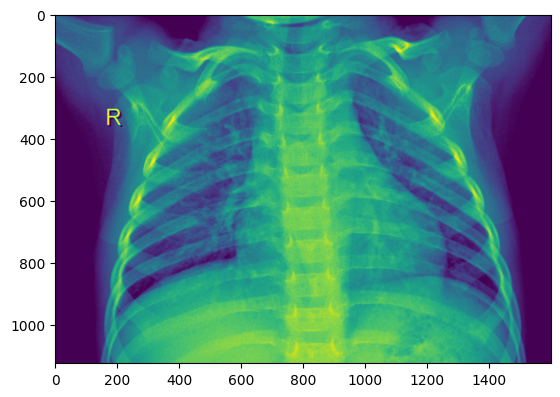

In [ ]:
#Normal image
image=mpimg.imread('/content/medical/chest_xray/train/NORMAL/IM-0125-0001.jpeg')
plt.imshow(image)

plt.show()

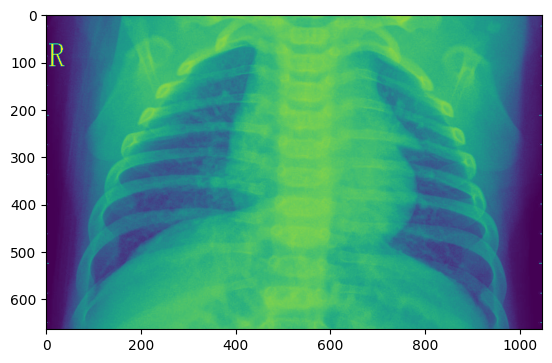

In [ ]:
#Image with pneumonia
image=mpimg.imread('/content/medical/chest_xray/train/PNEUMONIA/person1007_virus_1690.jpeg')
plt.imshow(image)

plt.show()

In [ ]:
normal_path=('/content/medical/chest_xray/train/NORMAL/')
data=[]

for img_file in normal_files:
    image=Image.open(normal_path +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

Pneumonia_path=('/content/medical/chest_xray/train/PNEUMONIA/')

for img_file in Pneumonia_files:
    image=Image.open(Pneumonia_path + img_file )
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(5216, 128, 128, 3)
(5216,)


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
#Function to plot the pixel intensity of each image
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5)
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5)

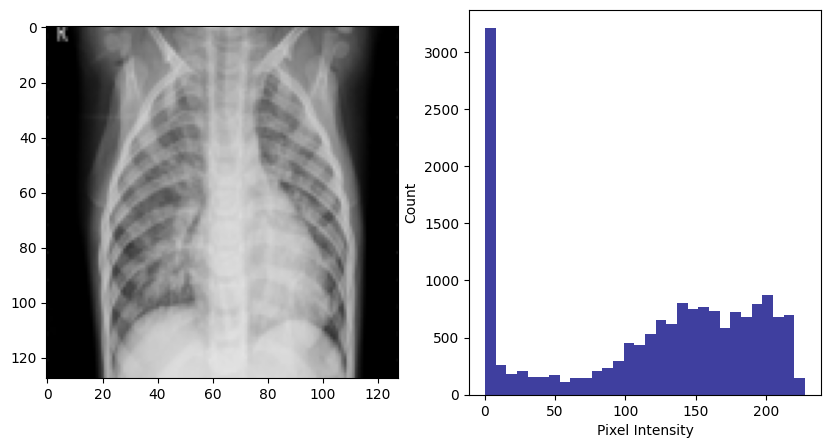

In [ ]:
#Histogram with Pixel Intensity
plotHistogram(X_train[np.random.randint(len(X_train))])

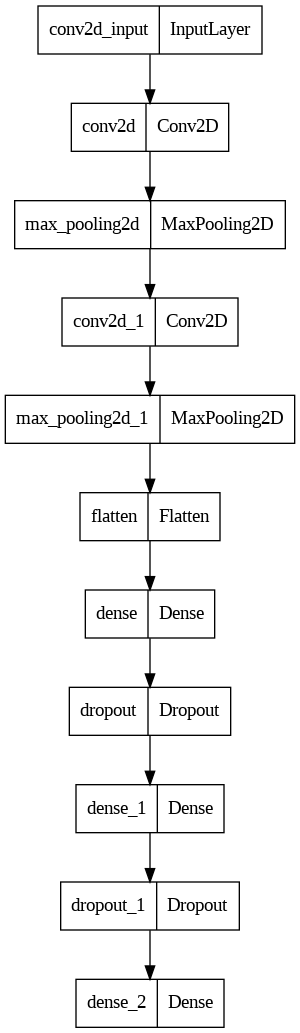

In [ ]:
keras.utils.plot_model(model, "my_model.png")

In [ ]:
history=model.fit(X_train_scaled,Y_train, validation_split=0.1, verbose=1, epochs=5)

Epoch 1/5
118/118 [==============================] - 10s 25ms/step - loss: 0.4235 - acc: 0.8074 - val_loss: 0.1938 - val_acc: 0.9282
Epoch 2/5
118/118 [==============================] - 2s 18ms/step - loss: 0.1918 - acc: 0.9315 - val_loss: 0.1577 - val_acc: 0.9306
Epoch 3/5
118/118 [==============================] - 2s 19ms/step - loss: 0.1556 - acc: 0.9459 - val_loss: 0.2047 - val_acc: 0.9282
Epoch 4/5
118/118 [==============================] - 2s 20ms/step - loss: 0.1292 - acc: 0.9563 - val_loss: 0.1686 - val_acc: 0.9450
Epoch 5/5
118/118 [==============================] - 2s 17ms/step - loss: 0.1064 - acc: 0.9622 - val_loss: 0.1203 - val_acc: 0.9498


In [ ]:
#Accuracy
loss,accuracy=model.evaluate(X_test_scaled, Y_test)

33/33 [==============================] - 0s 11ms/step - loss: 0.1062 - acc: 0.9636


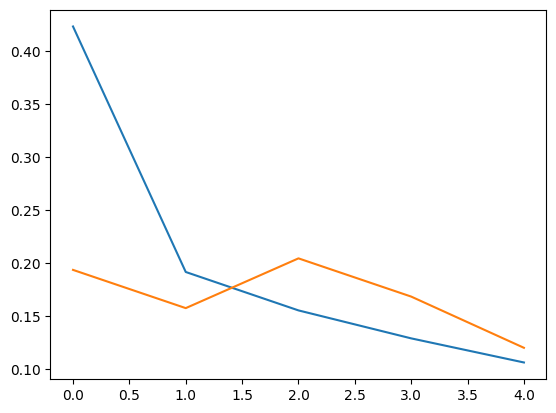

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')

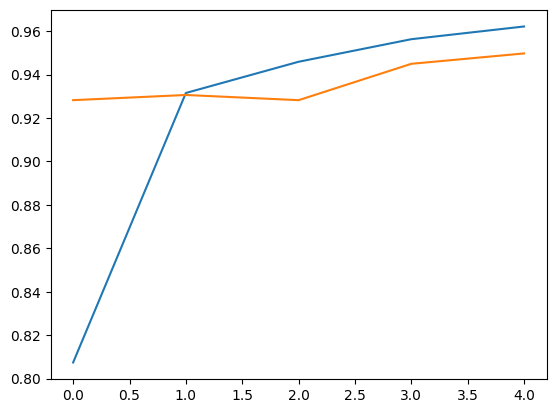

In [ ]:
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

x = model.output

#x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

new_model = Model(inputs=model.input, outputs=predictions)


In [ ]:
adam = Adam(learning_rate=0.001)
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)
new_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
new_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0     

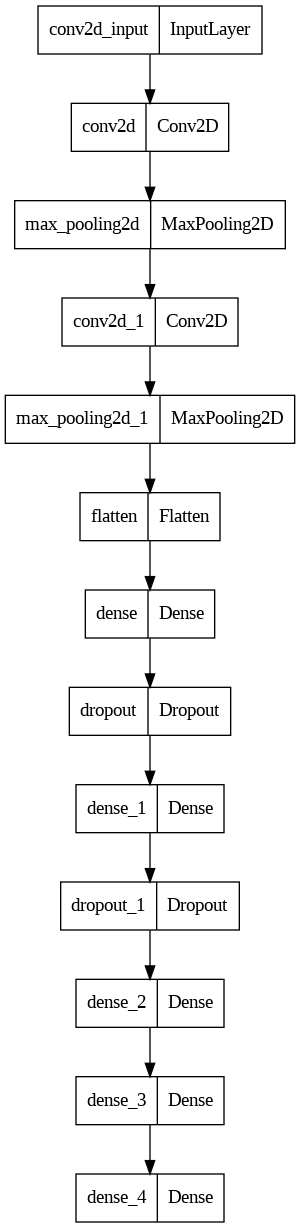

In [ ]:
keras.utils.plot_model(new_model, "my_new_model.png")

In [ ]:
history = new_model.fit(X_train_scaled,Y_train, batch_size=128, epochs=10, validation_split=0.1, shuffle = True, verbose=1, callbacks=[save_model])

Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 0.4511 - accuracy: 0.9417
Epoch 1: val_loss improved from inf to 0.27207, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 8s 113ms/step - loss: 0.4511 - accuracy: 0.9417 - val_loss: 0.2721 - val_accuracy: 0.9498
Epoch 2/10
29/30 [============================>.] - ETA: 0s - loss: 0.1761 - accuracy: 0.9674
Epoch 2: val_loss improved from 0.27207 to 0.15704, saving model to best_model.h5
30/30 [==============================] - 2s 63ms/step - loss: 0.1755 - accuracy: 0.9675 - val_loss: 0.1570 - val_accuracy: 0.9498
Epoch 3/10
29/30 [============================>.] - ETA: 0s - loss: 0.0929 - accuracy: 0.9749
Epoch 3: val_loss improved from 0.15704 to 0.14545, saving model to best_model.h5
30/30 [==============================] - 2s 64ms/step - loss: 0.0927 - accuracy: 0.9750 - val_loss: 0.1455 - val_accuracy: 0.9522
Epoch 4/10
29/30 [============================>.] - ETA: 0s - loss: 0.0640 - accuracy: 0.9803
Epoch 4: val_loss improved from 0.14545 to 0.13398, saving model to best_model.h5
30/30 [==============================] - 2s 73ms/step - loss: 0.0635 - accuracy: 

In [ ]:
# Accessing the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Printing the accuracy values for each epoch
for epoch, acc, val_acc in zip(range(1, len(train_accuracy) + 1), train_accuracy, val_accuracy):
    print(f'Epoch {epoch}: Training Accuracy = {acc:.4f}, Validation Accuracy = {val_acc:.4f}')


Epoch 1: Training Accuracy = 0.9417, Validation Accuracy = 0.9498
Epoch 2: Training Accuracy = 0.9675, Validation Accuracy = 0.9498
Epoch 3: Training Accuracy = 0.9750, Validation Accuracy = 0.9522
Epoch 4: Training Accuracy = 0.9806, Validation Accuracy = 0.9545
Epoch 5: Training Accuracy = 0.9806, Validation Accuracy = 0.9545
Epoch 6: Training Accuracy = 0.9845, Validation Accuracy = 0.9593
Epoch 7: Training Accuracy = 0.9845, Validation Accuracy = 0.9689
Epoch 8: Training Accuracy = 0.9864, Validation Accuracy = 0.9545
Epoch 9: Training Accuracy = 0.9848, Validation Accuracy = 0.9665
Epoch 10: Training Accuracy = 0.9896, Validation Accuracy = 0.9617


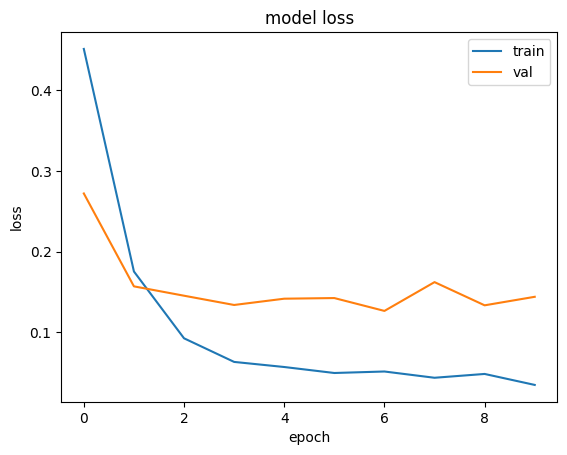

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

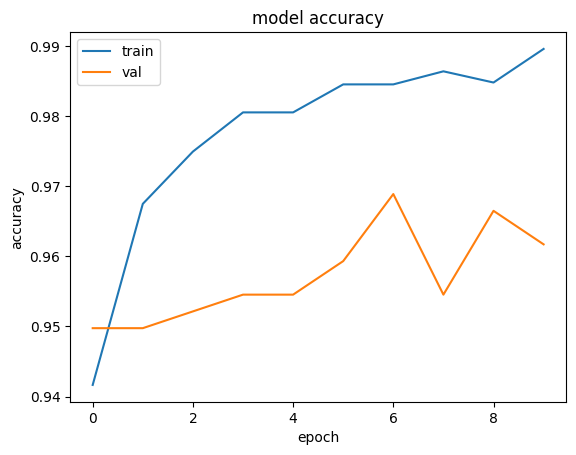

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

33/33 [==============================] - 0s 6ms/step


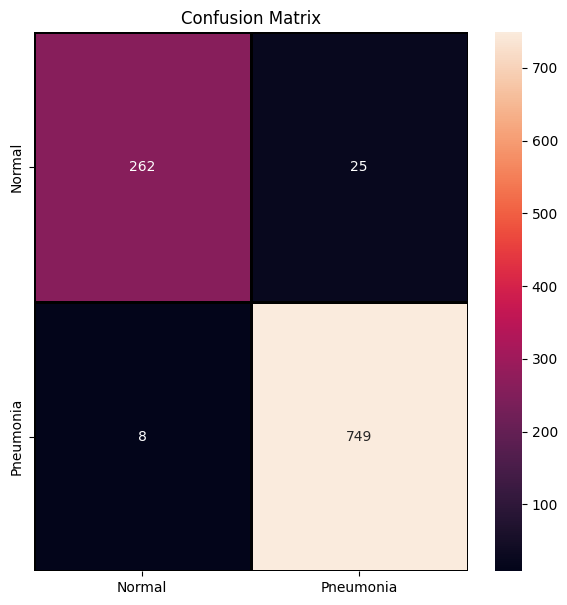

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Making predictions on the test data
predictions = new_model.predict(X_test_scaled)
binary_predictions = (predictions > 0.5).astype(int)

# Y_test is in the form of 0s and 1s
Y_test_array = pd.Series(Y_test).values

# Function for the confusion matrix
def plot_cm(predictions, Y_test, title):
    labels = ['Normal', 'Pneumonia']
    cm = confusion_matrix(Y_test, predictions)
    cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
    plt.figure(figsize=(7, 7))
    plt.title(title)
    sns.heatmap(cm, linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)
    plt.show()

plot_cm(binary_predictions, Y_test_array, 'Confusion Matrix')


In [ ]:
# Making predictions on the test data
predictions = new_model.predict(X_test_scaled)
binary_predictions = (predictions > 0.5).astype(int)
# Display the predictions for the first few examples
for i in range(min(5, len(X_test_scaled))):
    actual_value = int(Y_test[i])
    predicted_value = int(binary_predictions[i])
    probability = float(predictions[i])

    print(f"Example {i + 1}: Actual={actual_value}, Predicted={predicted_value} (Probability={probability:.4f})")


33/33 [==============================] - 0s 6ms/step
Example 1: Actual=1, Predicted=1 (Probability=0.9977)
Example 2: Actual=0, Predicted=0 (Probability=0.0098)
Example 3: Actual=1, Predicted=1 (Probability=0.9977)
Example 4: Actual=1, Predicted=1 (Probability=0.9977)
Example 5: Actual=1, Predicted=1 (Probability=0.9977)
